# An Introduction to Subplots in Matplotlib

Author: Lili Beit

In [17]:
# import pandas, matplotlib, and seaborn

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid") # choose style for plots

This data is from the [King County House Sales dataset](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)

In [18]:
# import the data

df = pd.read_csv('kc_house_data.csv')
df = df.loc[df['bedrooms']<33] # remove row with outlier number of bedrooms
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [19]:
# view columns

list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

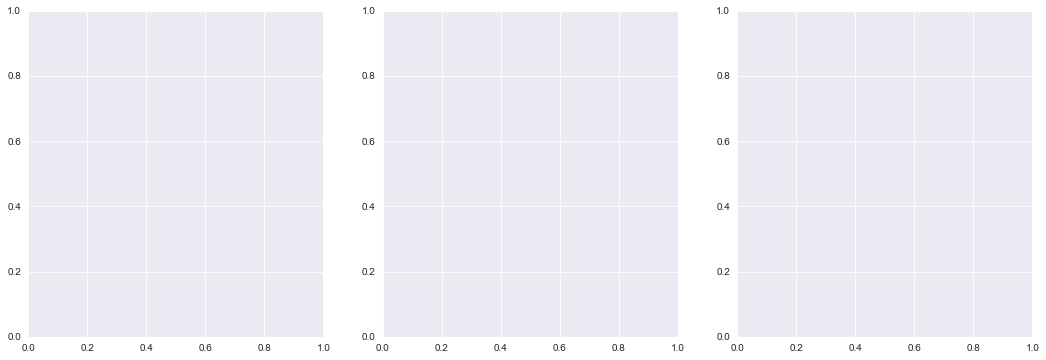

In [20]:
# create 3 empty subplots with plt.subplots()

plt.subplots(figsize=(18,6), nrows=1, ncols=3);
plt.savefig('images/3_empty_plots')

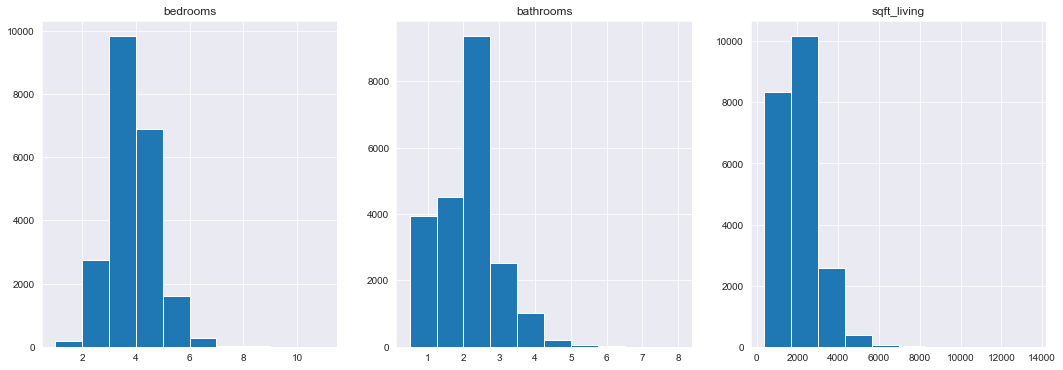

In [21]:
# add plots to each axis

fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=3);

ax[0].hist(df['bedrooms'])
ax[0].set_title('bedrooms')

ax[1].hist(df['bathrooms'])
ax[1].set_title('bathrooms')

ax[2].hist(df['sqft_living'])
ax[2].set_title('sqft_living')

plt.savefig('images/3_histograms');

Text(0.5, 1.0, 'sqft_living')

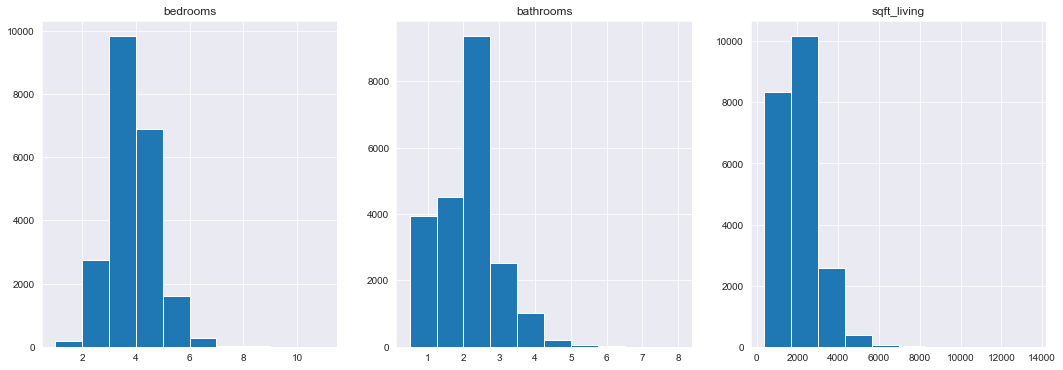

In [22]:
# add plots to each axis - alternative code

fig, [ax1, ax2, ax3] = plt.subplots(figsize=(18,6), nrows=1, ncols=3);

ax1.hist(df['bedrooms'])
ax1.set_title('bedrooms')

ax2.hist(df['bathrooms'])
ax2.set_title('bathrooms')

ax3.hist(df['sqft_living'])
ax3.set_title('sqft_living')

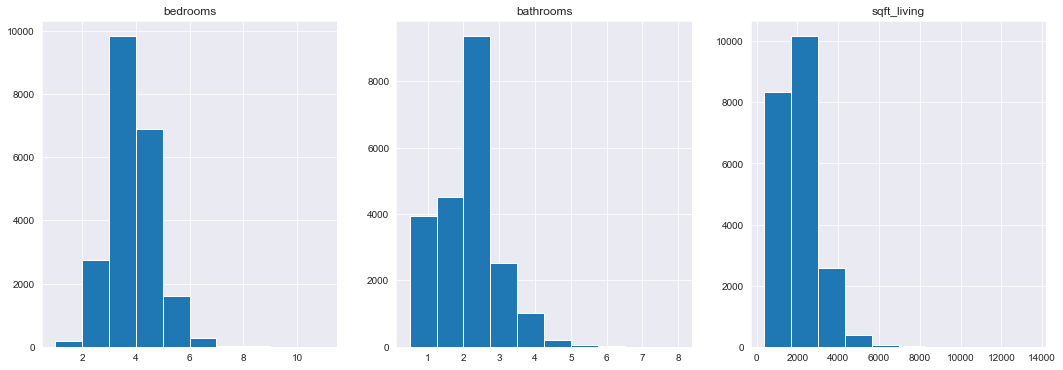

In [34]:
# create axes individually using plt.subplot()

plt.figure(figsize = (18,6));

ax1 = plt.subplot(1, 3, 1)
df['bedrooms'].hist()
plt.title('bedrooms')

ax2 = plt.subplot(1, 3, 2)
df['bathrooms'].hist();
plt.title('bathrooms')

ax3 = plt.subplot(1, 3, 3)
df['sqft_living'].hist()
plt.title('sqft_living')

plt.savefig('images/hist_no_figure')

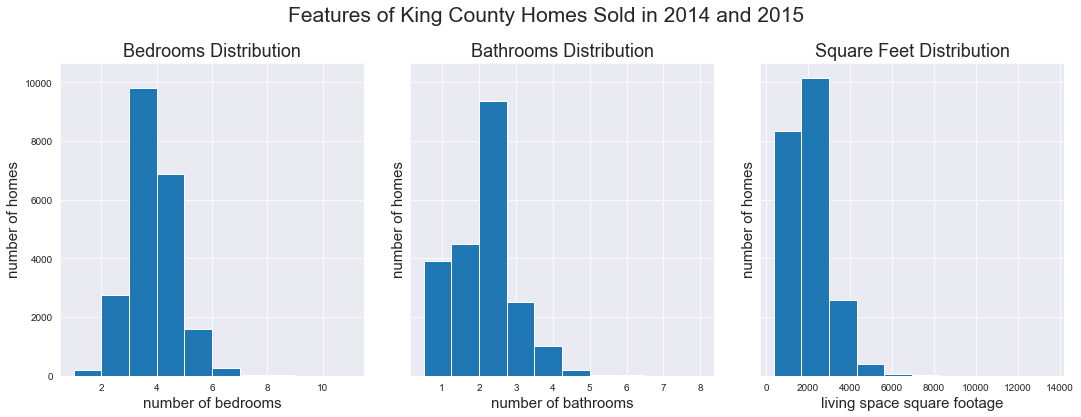

In [24]:
# add a figure title, axis titles, and labels

fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=3, sharey=True);
fig.suptitle('Features of King County Homes Sold in 2014 and 2015', fontsize=21)

ax[0].hist(df['bedrooms'])
ax[0].set_title('Bedrooms Distribution', fontsize=18)
ax[0].set_xlabel('number of bedrooms', fontsize=15)
ax[0].set_ylabel('number of homes', fontsize=15)

ax[1].hist(df['bathrooms'])
ax[1].set_title('Bathrooms Distribution', fontsize=18)
ax[1].set_xlabel('number of bathrooms', fontsize=15)
ax[1].set_ylabel('number of homes', fontsize=15)

ax[2].hist(df['sqft_living'])
ax[2].set_title('Square Feet Distribution', fontsize=18)
ax[2].set_xlabel('living space square footage', fontsize=15)
ax[2].set_ylabel('number of homes', fontsize=15)

plt.subplots_adjust(top=0.85, wspace=0.15)

plt.savefig('images/3_pretty_subplots')

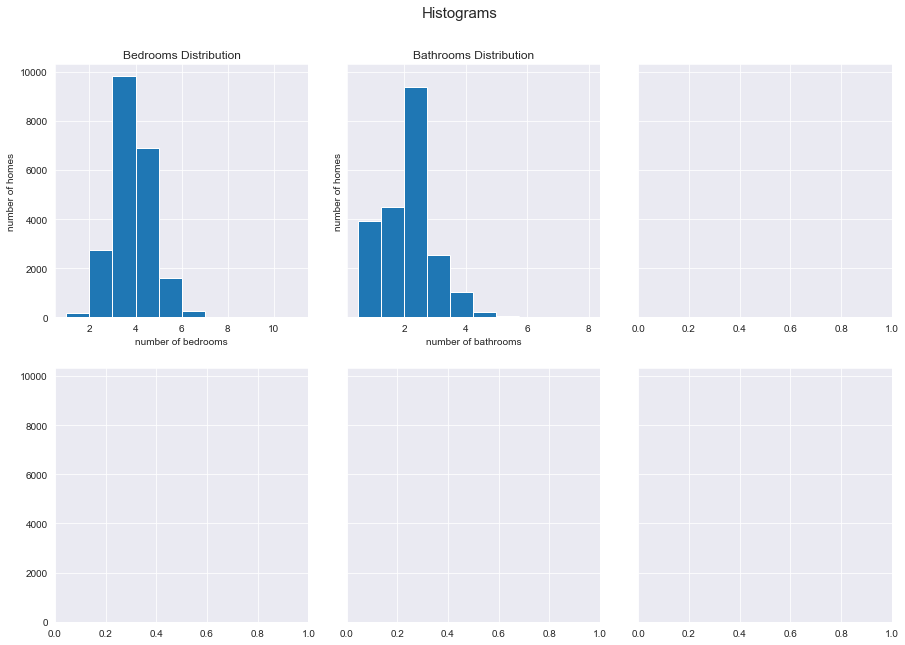

In [25]:
# if you tried to code 6 (or more) axes one at a time, it would take a long time

fig, ax = plt.subplots(figsize=(15,10), nrows=2, ncols=3, sharey=True);
fig.suptitle('Histograms', fontsize=15)

ax[0,0].hist(df['bedrooms'])
ax[0,0].set_title('Bedrooms Distribution')
ax[0,0].set_xlabel('number of bedrooms')
ax[0,0].set_ylabel('number of homes')

ax[0,1].hist(df['bathrooms'])
ax[0,1].set_title('Bathrooms Distribution')
ax[0,1].set_xlabel('number of bathrooms')
ax[0,1].set_ylabel('number of homes')

# I don't want to write these out anymore... let's automate them

plt.subplots_adjust(top=0.9, wspace=0.15)

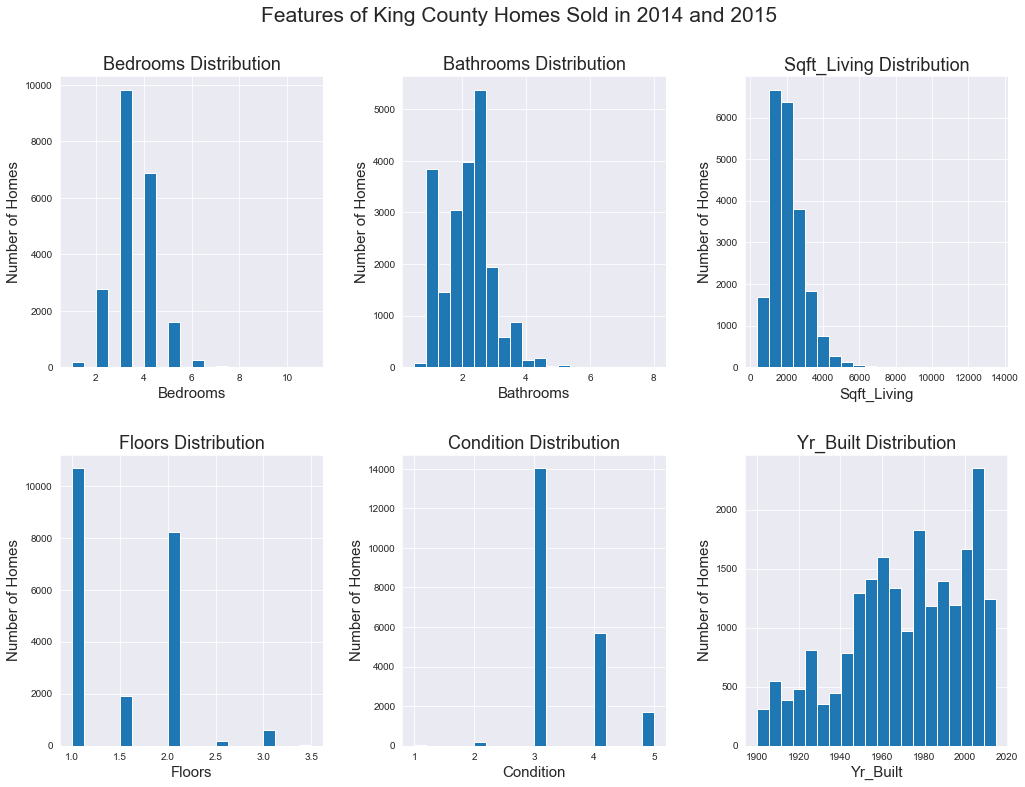

In [39]:
# choose features for the subplots
features = ['bedrooms', 
       'bathrooms', 
       'sqft_living', 
       'floors', 
       'condition', 
       'yr_built' ]

# choose how many columns you want
num_cols = 3

# set a number of rows
if len(features)%num_cols == 0:
    num_rows = len(features)//num_cols
else:
    num_rows = (len(features)//num_cols) + 1
    
# define the figure and axes
fig, ax = plt.subplots(figsize=(17,12), 
                       nrows=num_rows, 
                       ncols=num_cols)

# add a figure title
fig.suptitle('Features of King County Homes Sold in 2014 and 2015', 
             fontsize=21)

#use a for loop to create each subplot:
for feat in features:
    row = features.index(feat)//num_cols
    col = features.index(feat)%num_cols
    
    ax[row, col].hist(df[feat], bins=20)
    
    ax[row, col].set_title(feat.title()+' Distribution', 
                           fontsize=18)
    
    ax[row, col].set_xlabel(feat.title(),
                            fontsize=15)
    
    ax[row, col].set_ylabel('Number of Homes',
                            fontsize=15)
    
plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.3)

plt.savefig('images/6_subplots')